## 1\. 군집모형 성능 평가 2

## 2\. 핵심 원리 파헤치기 (Deep Dive)

  - **핵심 아이디어**: "잘 된 군집은 **내부에선 단단히 뭉쳐있고(높은 응집도)**, **외부와는 멀리 떨어져 있어야 한다(높은 분리도)**"는 것.

### 응집도(Cohesion)와 분리도(Separation)

  - **`응집도(cohesion)`**: 하나의 군집 내 데이터들이 얼마나 서로 가깝게 모여 있는지를 나타내는 척도.
  - **`분리도(separation)`**: 서로 다른 군집들이 얼마나 멀리 떨어져 있는지를 나타내는 척도.

-----

### 실루엣 계수 (Silhouette Coefficient)

  - **`실루엣 계수`**: 각 데이터 포인트가 자신이 속한 군집과 얼마나 잘 어울리는지를 측정하는 지표.
  - **'소속감 점수' 비유**: 점수가 높을수록 현재 속한 팀(군집)에 대한 만족도가 높고, 다른 팀과는 뚜렷한 경계가 있는 것. 점수가 낮거나 음수이면 다른 팀에 더 잘 맞는다는 의미.
  - **실루엣 계수 `s`의 공식**:
  $$s=\frac{b-a}{max(a,b)}$$
      - **`a` (응집도)**: 해당 데이터 포인트와 **같은 군집**에 속한 다른 모든 점들과의 평균 거리. 작을수록 좋음.
      - **`b` (분리도)**: 해당 데이터 포인트와 **가장 가까운 이웃 군집**에 속한 모든 점들과의 평균 거리. 클수록 좋음.
  - **값의 의미 (-1 \~ 1)**
      - **1에 가까울수록**: 군집이 매우 잘 형성됨.
      - **0에 가까울수록**: 군집의 경계에 위치함.
      - **-1에 가까울수록**: 잘못된 군집에 할당되었을 가능성이 높음.

-----

### WSS와 엘보우 방법 (Elbow Method)

  - **`엘보우 방법`**: 최적의 군집 개수를 찾는 직관적인 방법.
  - **`WSS(Within-cluster Sum of Squares)`**: 각 군집 내 데이터들이 해당 군집의 중심으로부터 얼마나 떨어져 있는지(거리 제곱의 합)를 모두 더한 값으로, 군집 내 총 응집도를 나타냄.
  - **원리**: 군집 개수(`k`)가 늘어날수록 WSS는 계속 감소하지만, 어느 지점을 넘어서면 감소율이 급격히 둔화됨. 이 \*\*'팔꿈치(Elbow)'\*\*처럼 꺾이는 지점이 비용(군집 수) 대비 효과(응집도 증가)가 가장 좋은 최적의 `k`값 후보가 됨.

-----

## 3\. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

  - 붓꽃(Iris) 데이터를 사용하여 최적의 군집 개수를 찾아가는 과정을 코드로 살펴봄.

### 1\) 실루엣 계수 분석 및 시각화

  - 군집 개수(`n_clusters`)를 2개부터 6개까지 변화시키면서 각 경우의 실루엣 점수를 계산하고 시각화함.

<!-- end list -->

For n_clusters = 2, The average silhouette_score is: 0.7653904101258123


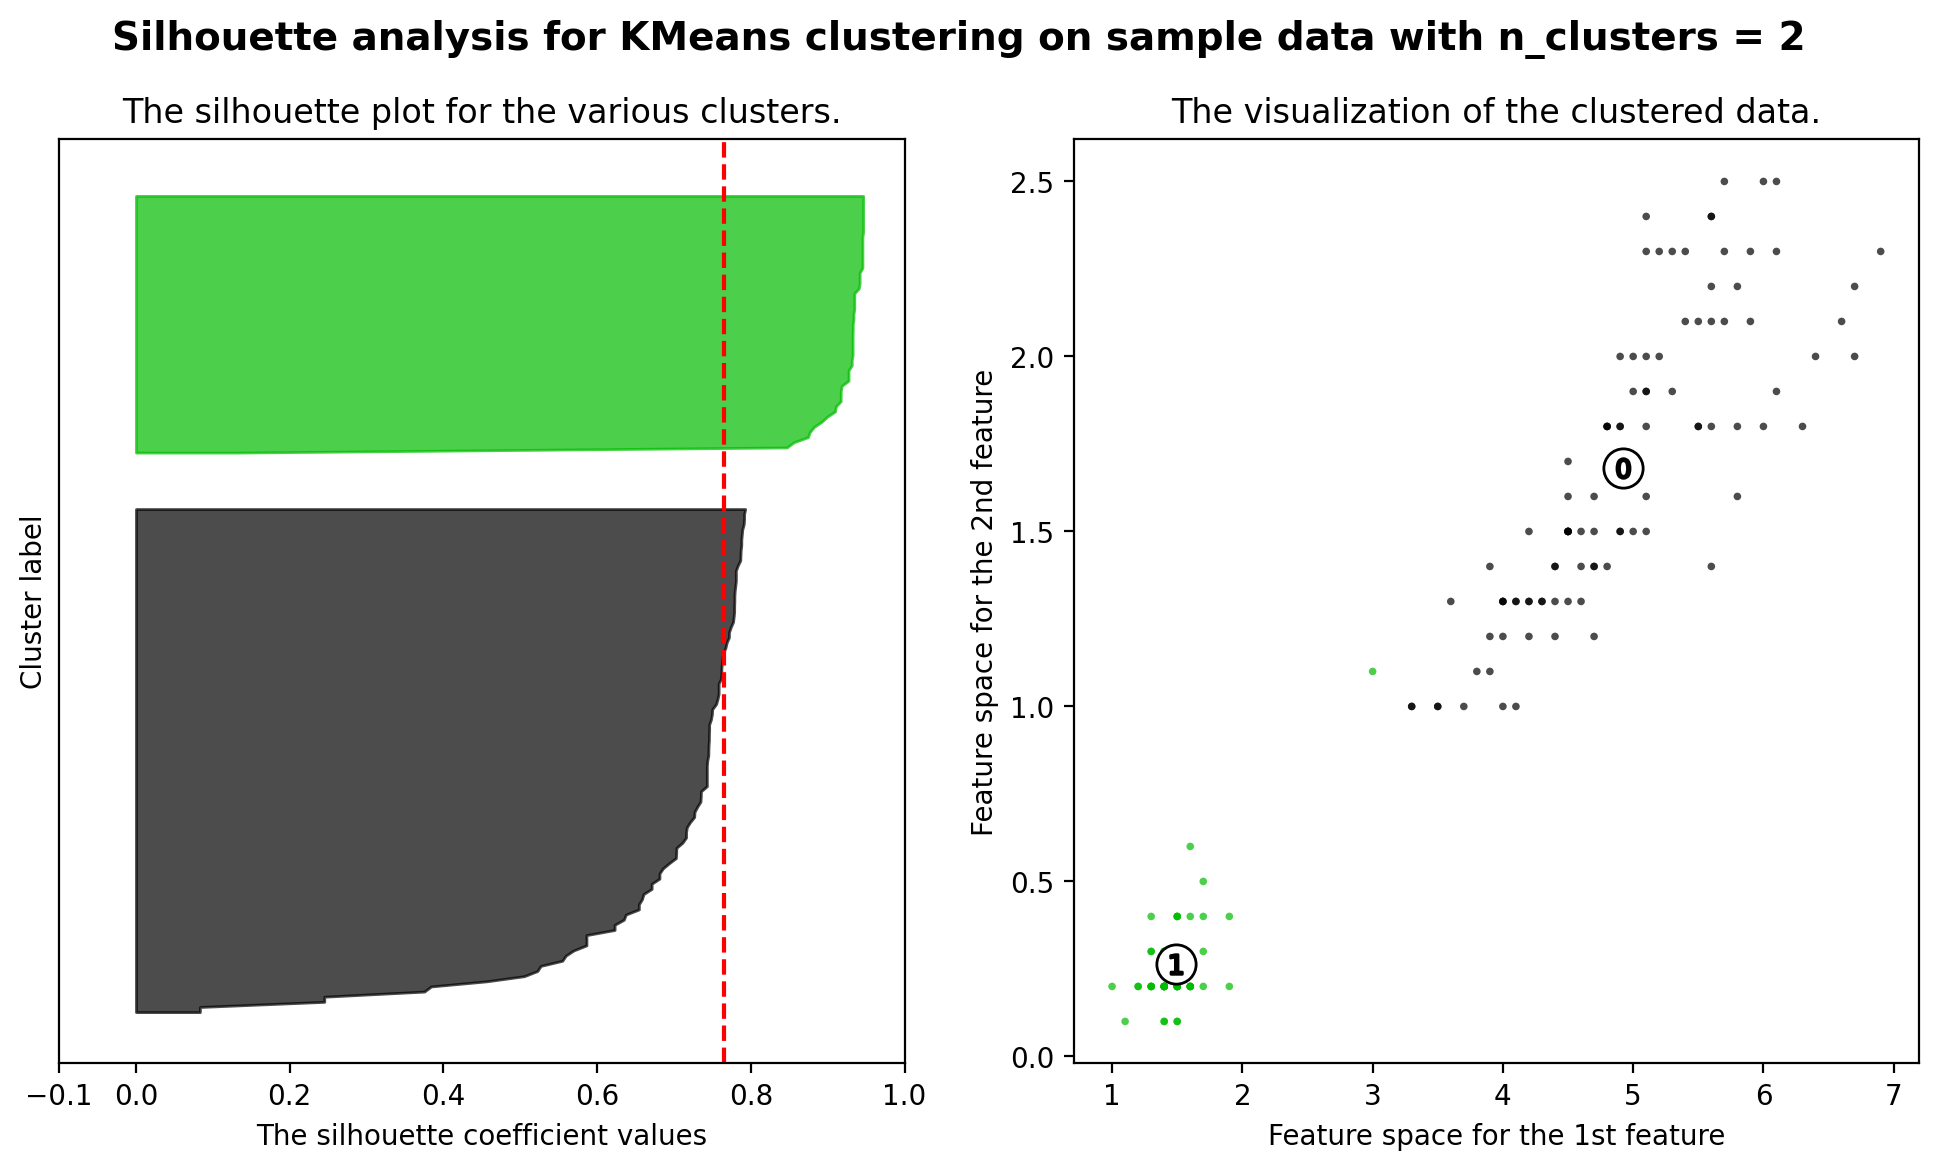

For n_clusters = 3, The average silhouette_score is: 0.6604800083974887


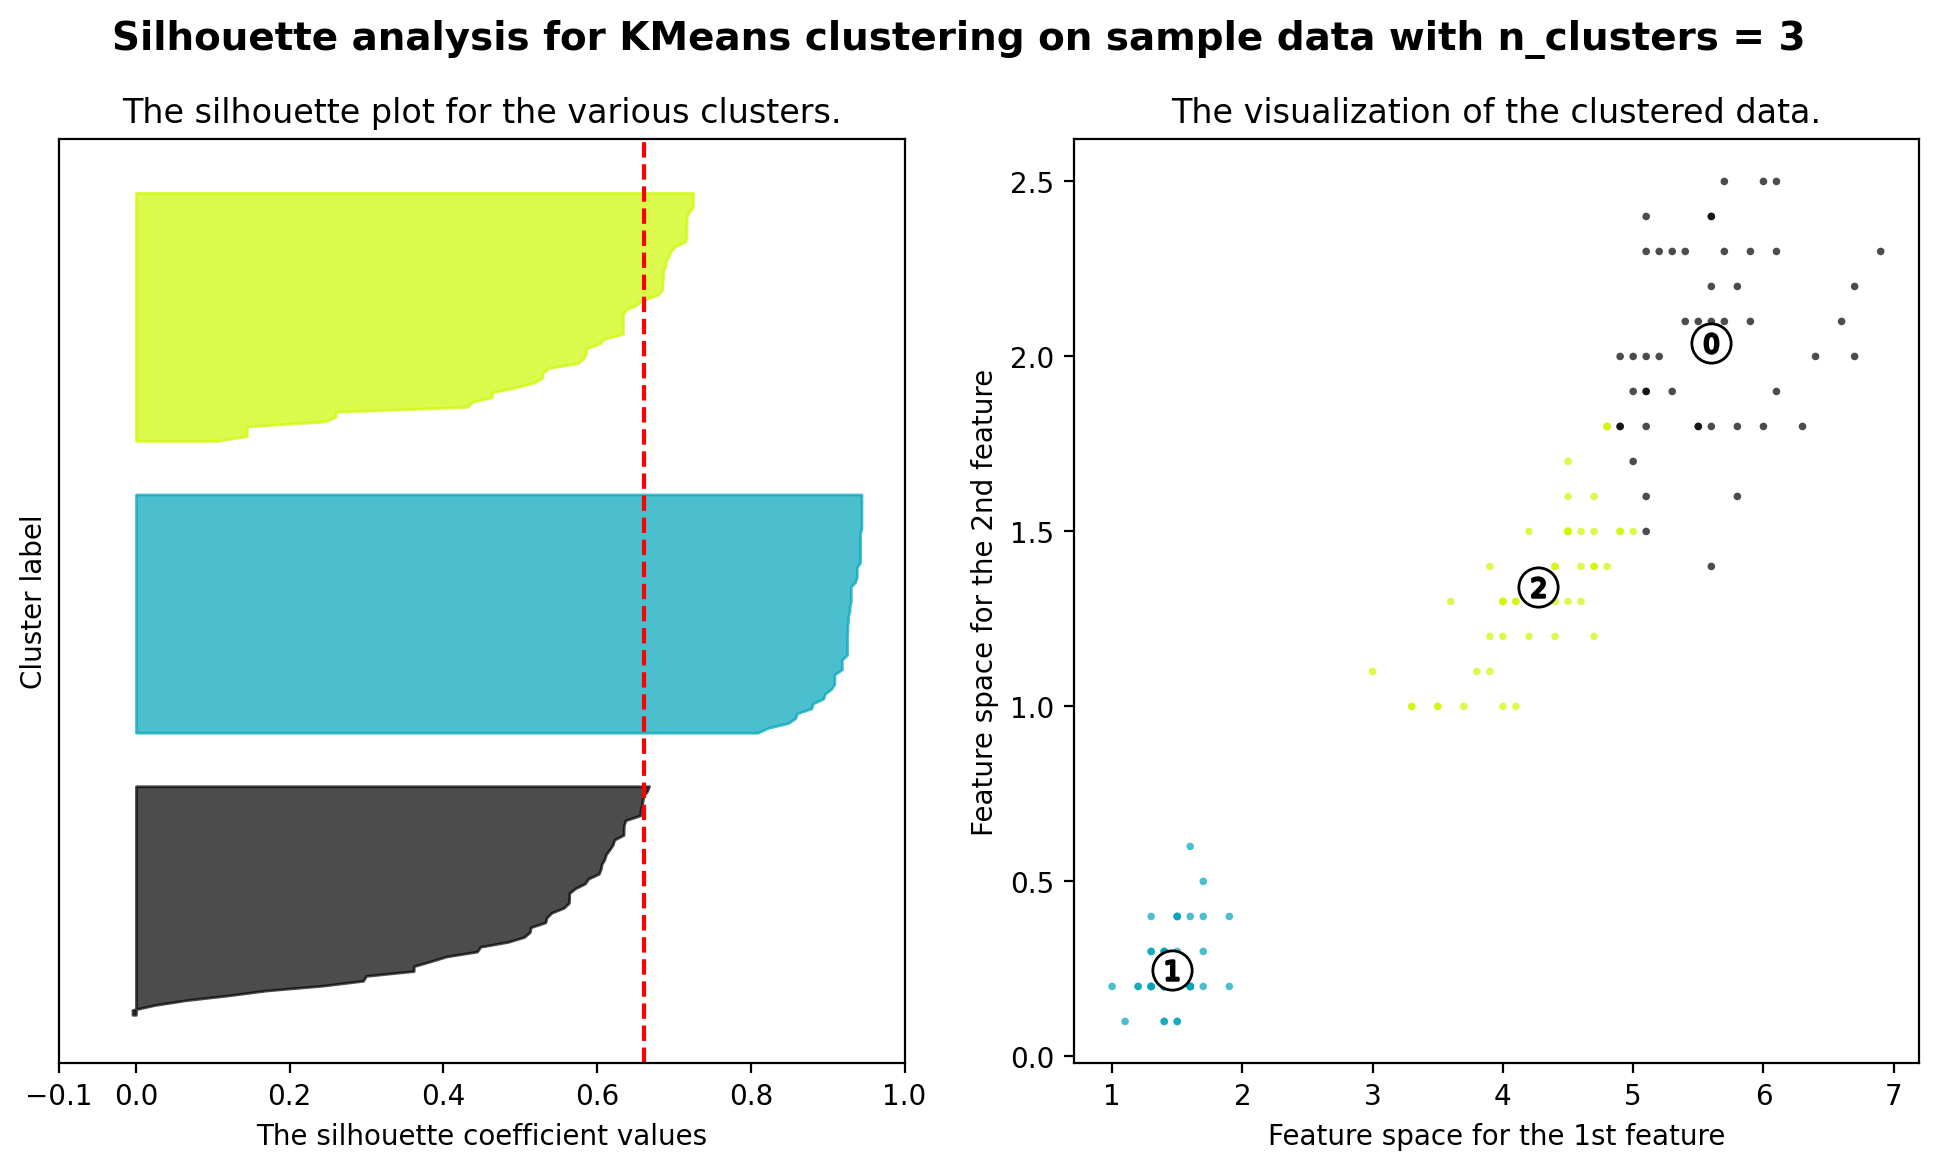

For n_clusters = 4, The average silhouette_score is: 0.6127580794464402


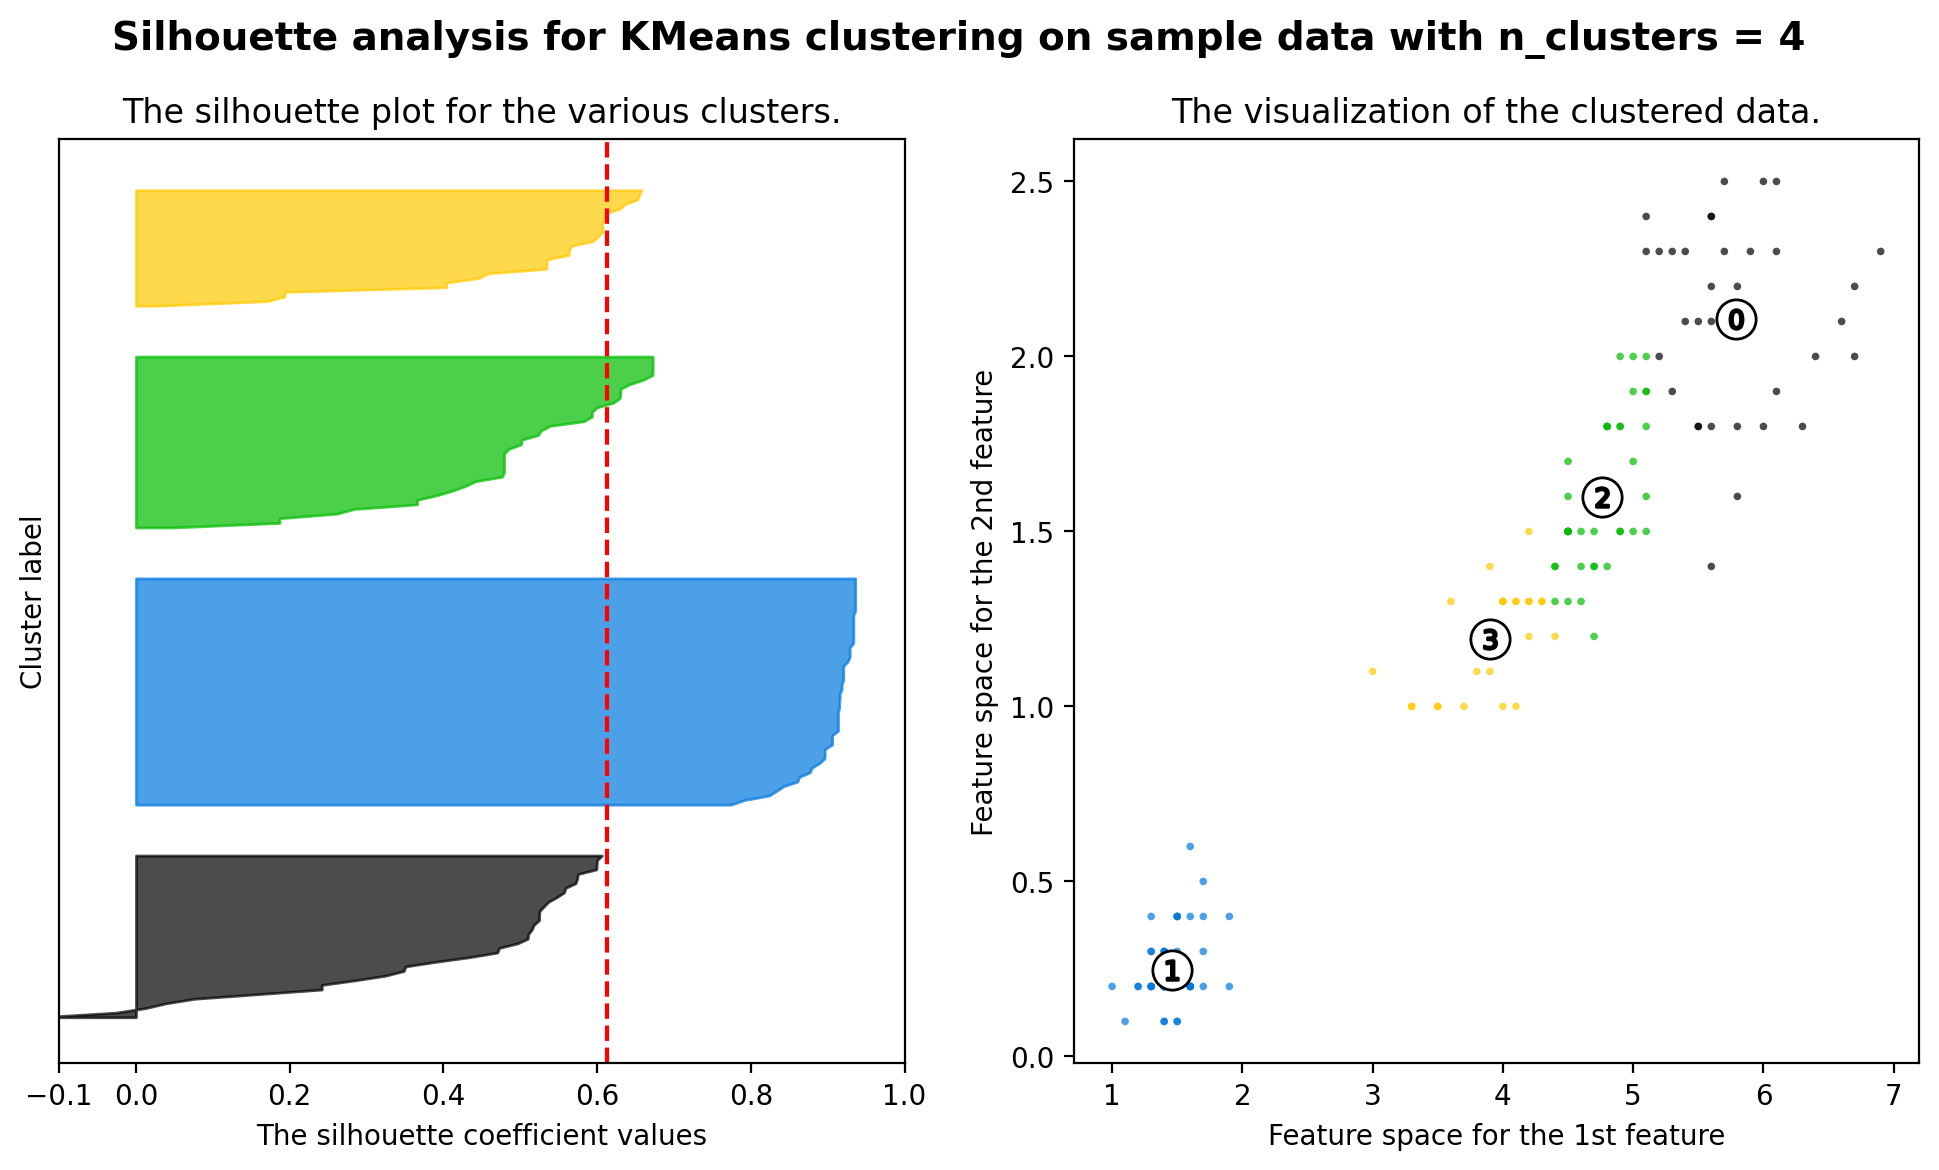

For n_clusters = 5, The average silhouette_score is: 0.5883732712110276


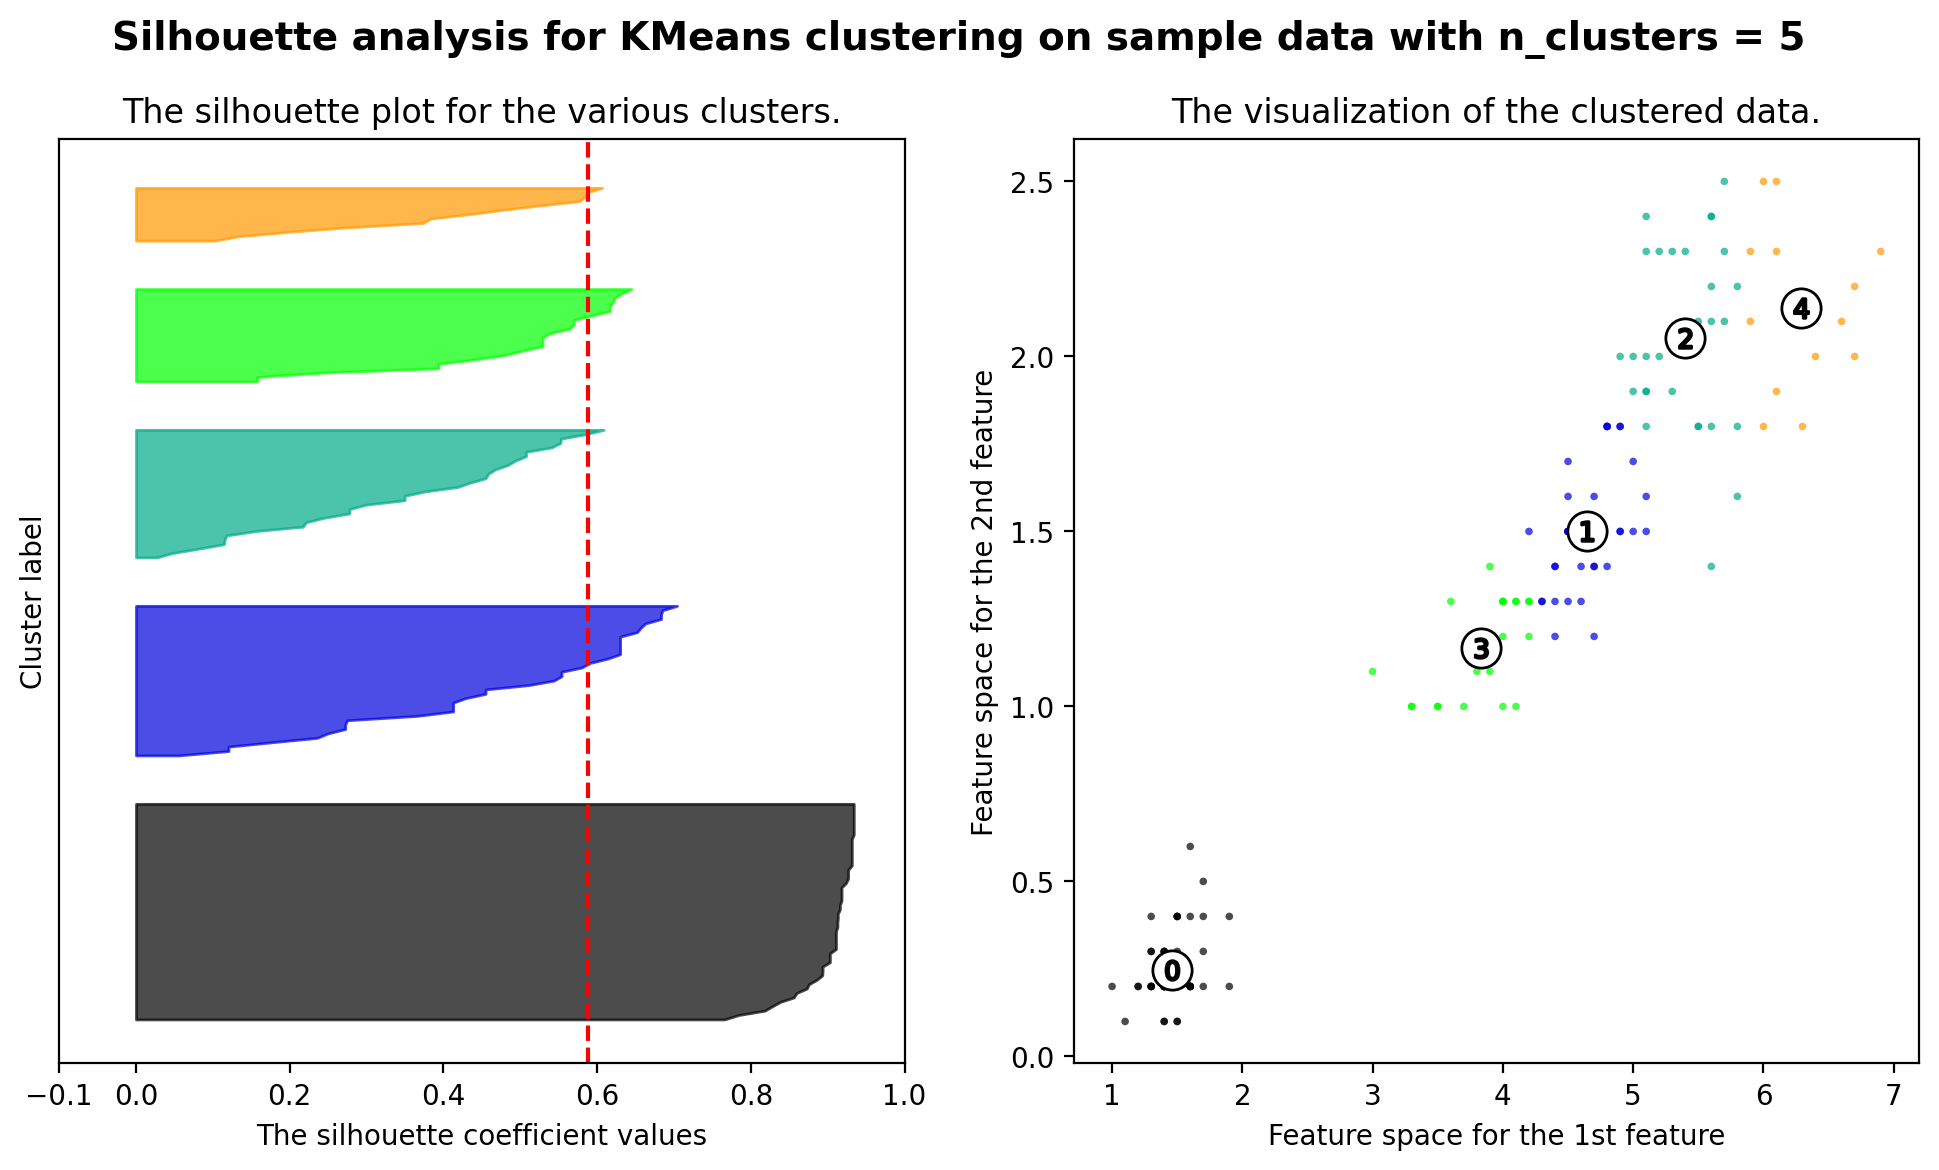

For n_clusters = 6, The average silhouette_score is: 0.5741633929857675


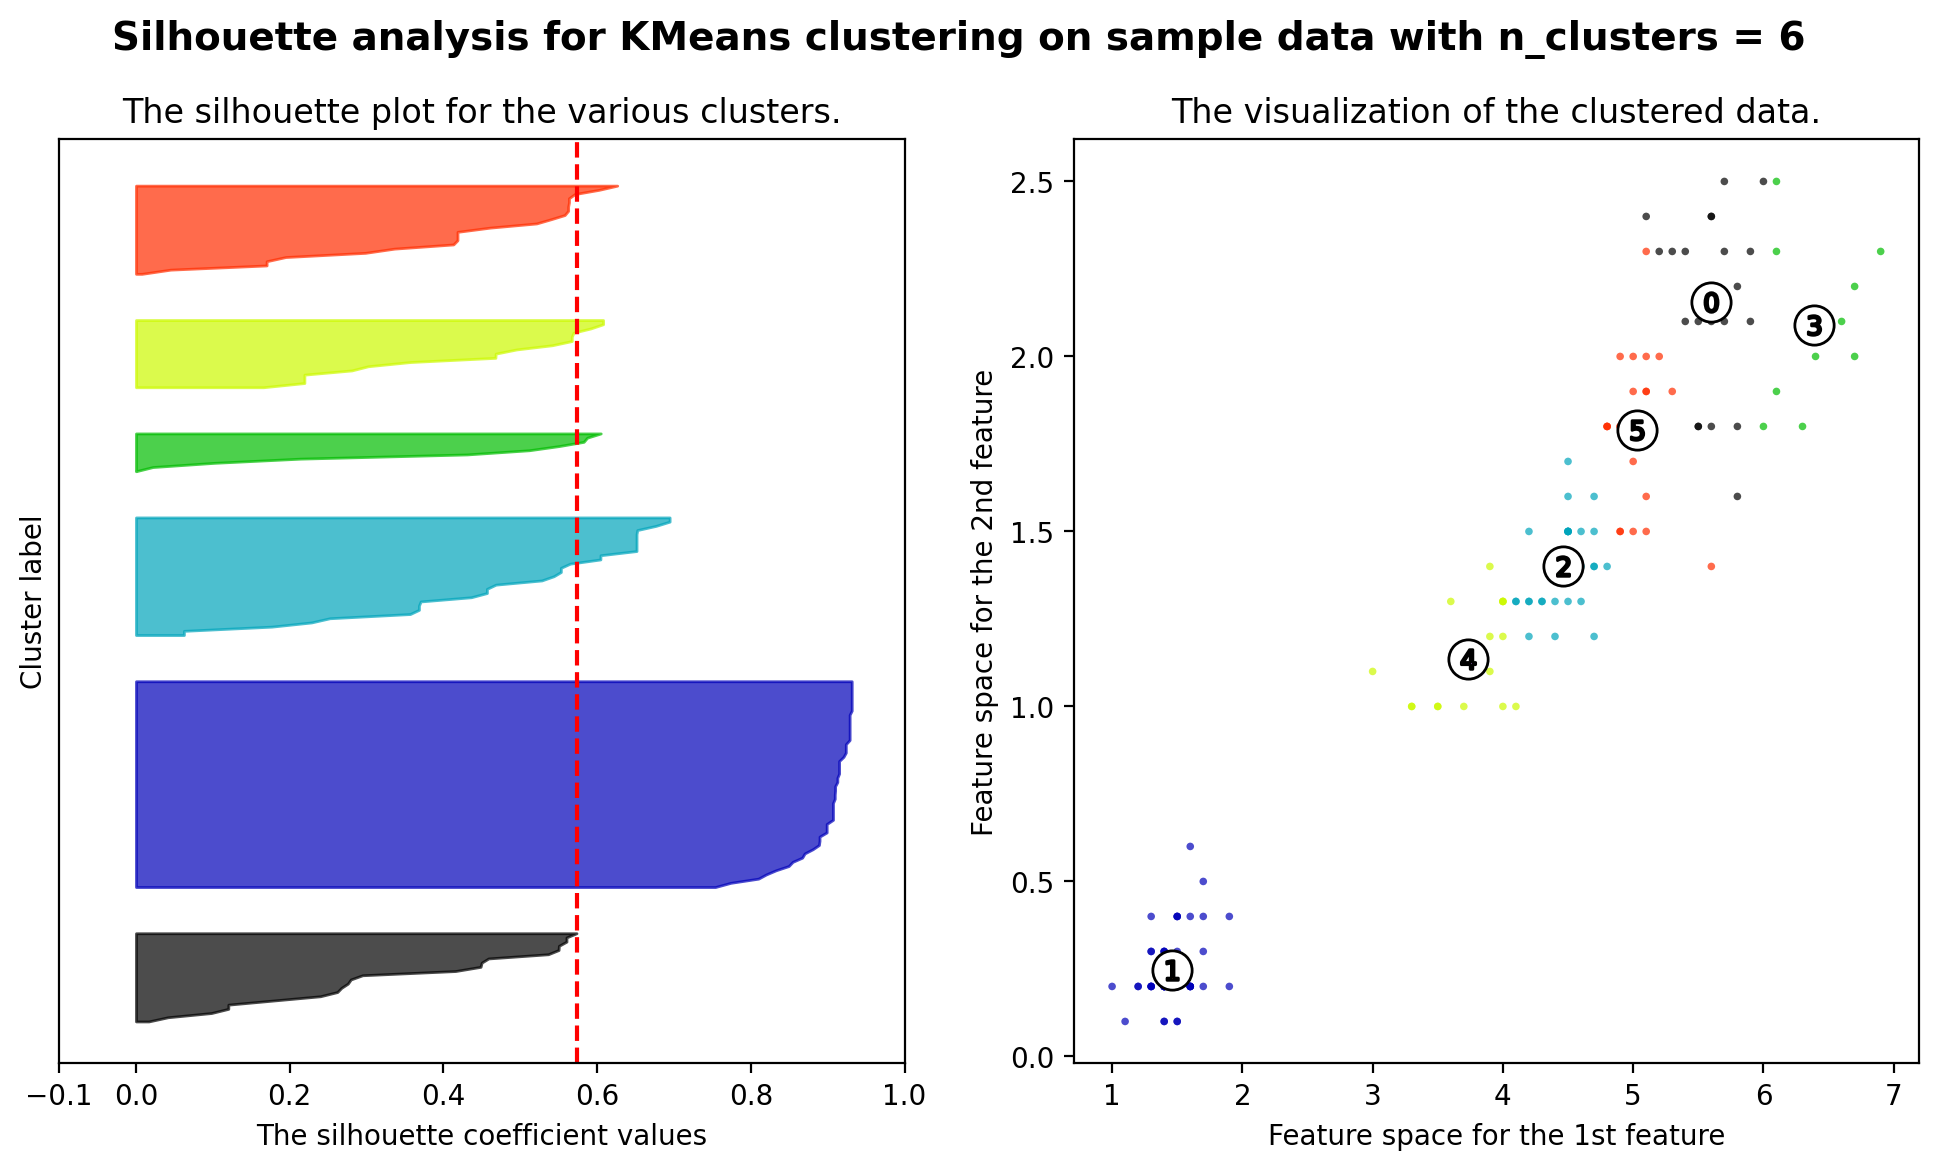

In [ ]:
# 필요 라이브러리 임포트
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 붓꽃(iris) 데이터 로드 및 사용할 특성 선택
iris = sns.load_dataset("iris")
iris_X = iris.loc[:, ["petal_length", "petal_width"]] # 꽃잎 길이와 너비 특성만 사용

# 분석할 클러스터 개수 범위 설정
range_n_clusters = [2, 3, 4, 5, 6]

# 각 클러스터 개수에 대해 실루엣 분석 수행
for n_clusters in range_n_clusters:
    # 1행 2열의 서브플롯 생성
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    # 첫 번째 서브플롯(실루엣 플롯)의 x축 범위 설정 (-0.1 ~ 1)
    ax1.set_xlim([-0.1, 1])
    # y축 범위 설정 (데이터 개수 + 여백)
    ax1.set_ylim([0, len(iris_X) + (n_clusters + 1) * 10])

    # KMeans 모델 생성 및 예측
    model = KMeans(n_clusters=n_clusters, random_state=10, n_init=10) # n_init 경고 방지를 위해 추가
    cluster_labels = model.fit_predict(iris_X)

    # 전체 샘플에 대한 평균 실루엣 점수 계산
    silhouette_avg = silhouette_score(iris_X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}") # f-string으로 변경

    # 각 샘플의 실루엣 점수 계산
    sample_silhouette_values = silhouette_samples(iris_X, cluster_labels)

    y_lower = 10
    # 각 클러스터에 속하는 데이터들의 실루엣 점수를 시각화
    for i in range(n_clusters):
        # i번 클러스터에 속하는 샘플들의 실루엣 점수 추출 및 정렬
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] # 조건부 인덱싱 수정
        ith_cluster_silhouette_values.sort()

        # i번 클러스터의 샘플 개수 및 y축 상단 위치 계산
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # 색상 설정
        color = cm.nipy_spectral(float(i) / n_clusters)
        # 실루엣 플롯을 수평 막대 그래프로 채우기
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 다음 클러스터 플롯을 위한 y_lower 값 갱신 (10만큼 간격 띄우기)
        y_lower = y_upper + 10

    # 그래프 제목 및 라벨 설정
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 평균 실루엣 점수를 빨간색 점선으로 표시
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 눈금 및 라벨 제거
    ax1.set_yticks([])
    # x축 눈금 설정
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 두 번째 서브플롯 (군집화된 데이터 산점도)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1],
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 각 군집의 중심점을 흰색 원으로 표시
    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    # 각 군집 중심에 군집 번호(숫자) 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    # 두 번째 서브플롯의 제목 및 라벨 설정
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # 전체 그림의 제목 설정
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

- **코드 해설**:
      - `for` 루프를 통해 지정된 클러스터 개수(2\~6개) 각각에 대해 K-Means 모델을 학습시키고 성능을 평가함.
      - \*\*`silhouette_score()`\*\*는 모든 데이터 포인트의 실루엣 계수 평균을 계산하여 해당 `k`값에 대한 전반적인 군집 품질을 나타냄.
      - \*\*`silhouette_samples()`\*\*는 각 데이터 포인트별 실루엣 계수를 계산함.
      - **왼쪽 그래프(실루엣 플롯)**: 각 클러스터에 속한 데이터들의 실루엣 계수를 보여줌. 막대의 폭이 넓고, 빨간 점선(평균 실루엣 점수)의 오른쪽에 많이 분포할수록 좋은 군집임.
      - **오른쪽 그래프(산점도)**: 실제 데이터가 어떻게 군집화되었는지 시각적으로 보여줌.
  - **결과 해석**: 평균 실루엣 점수는 \*\*`k=2`\*\*일 때 가장 높고, `k`가 증가할수록 점차 감소함. 실루엣 플롯을 보면, \*\*`k=2`와 `k=3`\*\*일 때 대부분의 데이터가 평균 점수보다 높은 값을 가져 비교적 군집이 잘 형성되었다고 볼 수 있음. 반면 `k=4` 이상부터는 일부 군집의 품질이 다소 떨어짐을 확인할 수 있음.

### 2\) WSS와 엘보우 방법을 이용한 최적 k 찾기

  - 클러스터 개수 `k`를 1부터 9까지 늘려가며 각 `k`에 대한 WSS(`Distortion`) 값을 계산하고, 엘보우 포인트를 찾아 시각화함.

<!-- end list -->

In [ ]:
!pip install kneed

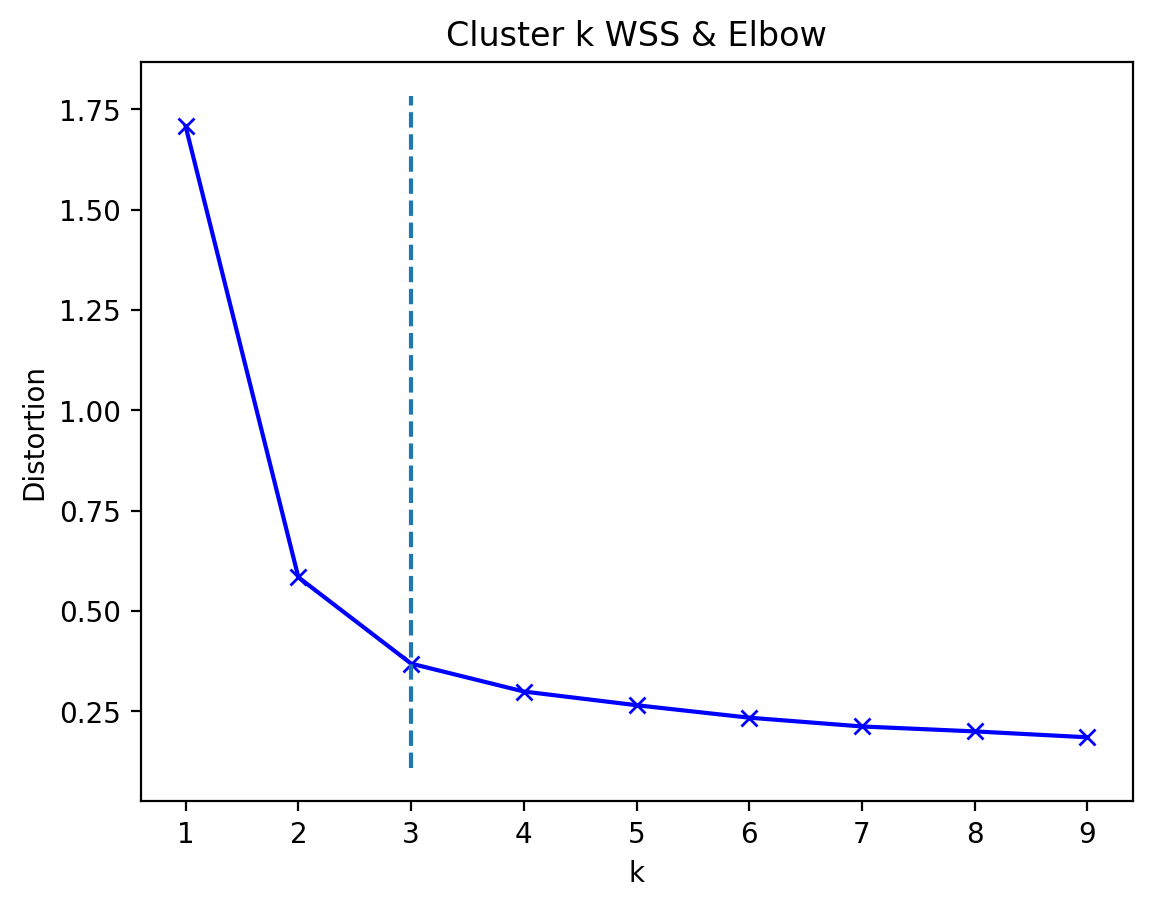

The best k by elbow method is: 3


In [ ]:
# 필요 라이브러리 임포트
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist # 거리 계산을 위한 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator # 엘보우/무릎 지점을 찾기 위한 라이브러리

# 데이터 준비 (앞 코드와 동일)
iris = sns.load_dataset("iris")
X = iris.loc[:, ["petal_length", "petal_width"]] # 변수명을 X로 통일

# k값의 변화에 따른 WSS(왜곡) 값을 저장할 리스트
distortions = []
K = range(1, 10)

# k가 1부터 9까지 변하면서 WSS 계산
for k in K:
    # K-Means 모델 생성 및 학습
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=10).fit(X) # n_init 경고 방지를 위해 추가

    # 각 데이터 포인트와 모든 클러스터 중심 사이의 유클리드 거리 계산
    euc_dist = cdist(X, kmeans_model.cluster_centers_, 'euclidean')

    # 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그 거리의 합을 계산
    # WSS = 각 점과 가장 가까운 중심 사이 거리의 제곱합이지만, 여기서는 거리의 합을 사용(경향성은 동일)
    distortion = sum(np.min(euc_dist, axis=1)) / X.shape[0]
    distortions.append(distortion)

# kneed 패키지를 사용하여 엘보우 지점 찾기
kn = KneeLocator(list(K), distortions,
                  curve='convex', direction='decreasing')

# WSS와 엘보우 지점 시각화
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster k WSS & Elbow')

# 찾은 엘보우 지점에 수직 점선 그리기
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print(f"The best k by elbow method is: {kn.knee}")

- **코드 해설**:
      - `scipy.spatial.distance.cdist` 함수를 사용해 모든 데이터 포인트와 클러스터 중심점들 사이의 거리를 효율적으로 계산함.
      - **`kneed`** 라이브러리의 \*\*`KneeLocator`\*\*는 WSS 값들이 급격히 꺾이는 지점, 즉 엘보우 포인트를 자동으로 찾아주는 편리한 도구임.
  - **결과 해석**: 그래프를 보면 **k=3** 지점에서 기울기가 급격히 완만해지는 '팔꿈치' 모양이 뚜렷하게 나타남. `kneed` 라이브러리 또한 최적의 k로 3을 찾아주었음. 이는 클러스터를 3개로 설정하는 것이 효율성 측면에서 가장 적절한 선택일 수 있음을 시사함.

### 3\) 칼린스키-하라바시 점수 (Calinski-Harabasz Score)

  - **`칼린스키-하라바시 지수`**: 군집 내 분산 대비 군집 간 분산의 비율을 계산하는 지표. '군집 내 데이터는 잘 뭉쳐있고, 군집끼리는 멀리 떨어져 있을수록' 높은 점수를 받음. 이 점수가 가장 높은 `k`를 최적의 군집 개수로 선택할 수 있음.

<!-- end list -->

In [ ]:
# 필요 라이브러리 임포트
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering # 다른 군집 알고리즘 예시
from sklearn.metrics import calinski_harabasz_score

# 데이터 준비
iris = sns.load_dataset("iris")
data = iris.iloc[:, :-1] # 품종(species)을 제외한 모든 특성 사용

ch_score = []
# k를 2부터 5까지 변화시키면서 점수 측정
for i in range(2, 6):
    # 계층적 군집분석(AgglomerativeClustering) 모델 생성 및 학습
    clustering = AgglomerativeClustering(n_clusters=i).fit(data)

    # 칼린스키-하라바시 점수 계산 및 리스트에 추가
    score = calinski_harabasz_score(data, clustering.labels_)
    ch_score.append(score)
    print(f"For n_clusters = {i}, The Calinski-Harabasz score is: {score}")

# 결과 출력
print("\nScores for k=2, 3, 4, 5:")
print(ch_score)

- **코드 해설**:
      - K-Means가 아닌 계층적 군집분석(`AgglomerativeClustering`)을 예시로 사용하여, 평가지표가 특정 알고리즘에 종속되지 않음을 보여줌.
      - `calinski_harabasz_score` 함수에 데이터와 군집 예측 라벨을 전달하면 간단하게 점수를 계산할 수 있음.
  - **결과 해석**: 출력된 점수를 보면, 클러스터 개수가 3개일 때 칼린스키-하라바시 점수가 약 558.06으로 가장 높음. 이 결과 역시 \*\*`k=3`\*\*이 최적의 군집 개수일 수 있음을 강력하게 지지함.

-----

## 4\. 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: 고객을 몇 그룹으로 나눌지 더 이상 '감'에 의존할 필요 없음. \*\*`실루엣 계수`\*\*나 **`엘보우 방법`** 같은 데이터 기반 객관적 지표를 활용하여 명확한 근거를 가지고 타겟 마케팅 전략 수립이 가능함.
  - **기술 관점 (실루엣 계수)**: \*\*`실루엣 계수`\*\*는 전체 군집의 평균 품질뿐만 아니라, 각 데이터 포인트와 개별 군집의 '건강 상태'까지 진단할 수 있는 매우 유용한 도구임.
  - **기술 관점 (통합적 접근)**: \*\*`엘보우 방법`\*\*은 최적의 k를 시각적으로 파악하는 데 유용하지만, '팔꿈치'가 모호할 때도 있음. 이럴 때 \*\*`실루엣 점수`\*\*나 \*\*`칼린스키-하라바시 지수`\*\*와 같은 다른 지표를 교차 검증하면 더 신뢰도 높은 결론을 내릴 수 있음.